Example of using package called featexp (https://pypi.org/project/featexp/) to support feature exploration <br>
DataSet comes from https://www.kaggle.com/c/santander-customer-satisfaction

In [1]:
import warnings
warnings.filterwarnings("ignore")

from IPython.display import clear_output

In [2]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from featexp import univariate_plotter
from featexp import get_trend_stats
from featexp import get_univariate_plots

In [3]:
%matplotlib inline 

In [4]:
def feature_importance_to_df(xgb_model):
    imp = pd.DataFrame(np.asarray(list(xgb_model.get_fscore().keys())))
    imp.columns = ['Feature']
    imp['importance'] = np.asarray(list(xgb_model.get_fscore().values()))
    imp = imp.sort_values(by=['importance'], ascending=False)
    imp = imp.reset_index(drop=True)
    return imp
def rem_const(df):
    res = df
    for col in df.columns:
            if len(df[col].unique()) == 1:
                    res = res.drop(col,axis=1)
    return res, df.shape[1], res.shape[1]
    
def rem_miss(df, trsh = 0.05):
    res = df
    rows = res.shape[1]
    for c in res:
        if sum(res[c].isnull())/rows >= trsh:
            res.drop(c, axis=1, inplace=True)
    return res, df.shape[1], res.shape[1]

In [5]:
train = pd.read_csv('./files/train.csv')

In [6]:
train, bef, aft = rem_const(train)
print(bef-aft)

34


In [7]:
train, bef, aft = rem_miss(train)
print(bef-aft)

0


In [8]:
excl_from_x = ['ID', 'TARGET','ind_var5_0', 'ind_var6', 'ind_var18_0', 'ind_var18', 'ind_var29', 'ind_var30_0', 'ind_var34_0', 'ind_var34', 'num_var6', 'num_var18_0', 'num_var18', 'num_var29', 'num_var34_0', 'num_var34', 'saldo_var6', 'saldo_var13_medio', 'saldo_var18', 'saldo_var29', 'saldo_var34', 'delta_imp_amort_var18_1y3', 'delta_imp_amort_var34_1y3', 'delta_imp_aport_var33_1y3', 'delta_imp_reemb_var33_1y3', 'delta_imp_trasp_var33_out_1y3', 'delta_num_aport_var33_1y3', 'delta_num_reemb_var33_1y3', 'delta_num_trasp_var33_out_1y3', 'imp_amort_var18_ult1', 'imp_amort_var34_ult1', 'imp_aport_var33_ult1', 'imp_var7_emit_ult1', 'imp_reemb_var17_hace3', 'imp_reemb_var33_ult1', 'imp_trasp_var17_in_hace3', 'imp_trasp_var33_in_hace3', 'imp_trasp_var33_in_ult1', 'imp_trasp_var33_out_ult1', 'ind_var7_emit_ult1', 'num_aport_var33_ult1', 'num_var7_emit_ult1', 'num_reemb_var17_hace3', 'num_reemb_var33_ult1', 'num_trasp_var17_in_hace3', 'num_trasp_var33_out_ult1', 'saldo_medio_var13_medio_hace2', 'saldo_medio_var13_medio_ult1', 'saldo_medio_var13_medio_ult3', 'saldo_medio_var29_hace2', 'saldo_medio_var29_hace3', 'saldo_medio_var29_ult1', 'saldo_medio_var29_ult3'
]
all_but_idx = [col for col in train.columns if col not in excl_from_x]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(train[all_but_idx], train['TARGET'], test_size=0.333, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train[all_but_idx], y_train, test_size=0.5, random_state=0)

In [10]:
data_train = X_train
data_train['TARGET'] = y_train
data_test = X_test
data_test['TARGET'] = y_test
data_val = X_val
data_val['TARGET'] = y_val

                                           Plots for var38                                            
                                           Train data plots                                           


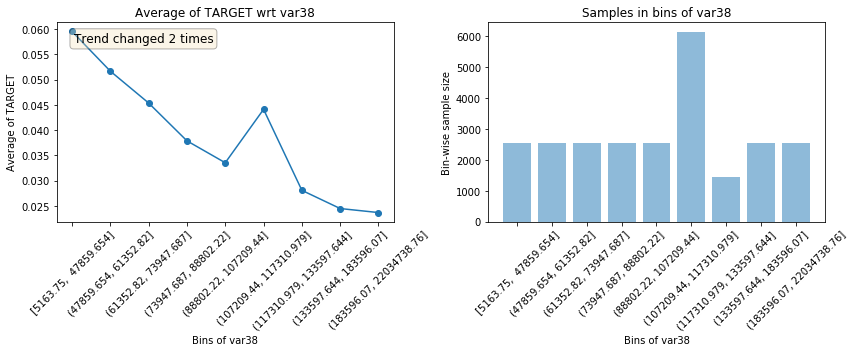

                                           Test data plots                                            


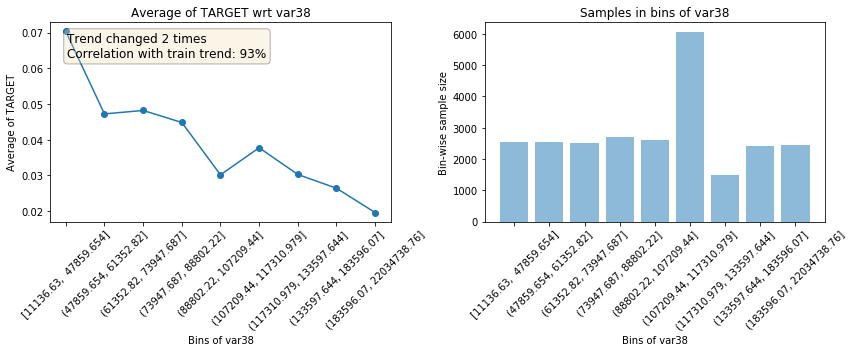

--------------------------------------------------------------------------------------------------------------


                                       Plots for num_var22_ult3                                       
                                           Train data plots                                           


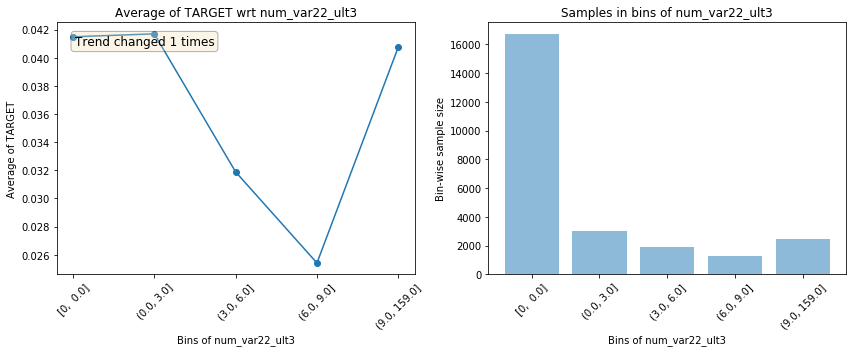

                                           Test data plots                                            


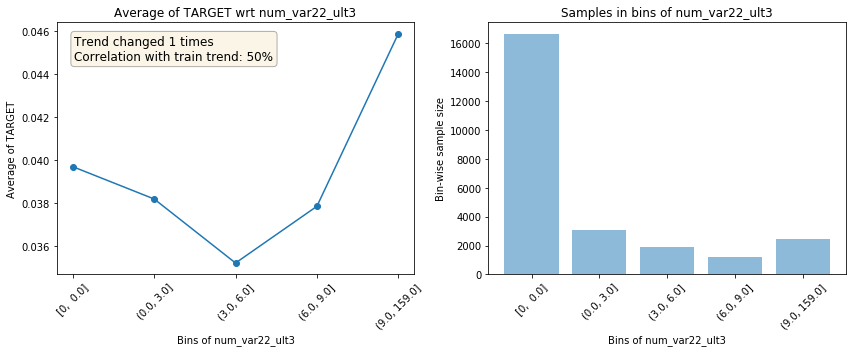

--------------------------------------------------------------------------------------------------------------




In [11]:
get_univariate_plots(data=data_train, target_col='TARGET', features_list=['var38', 'num_var22_ult3'], data_test=data_test)

                                       Plots for num_var22_ult3                                       
                                           Train data plots                                           


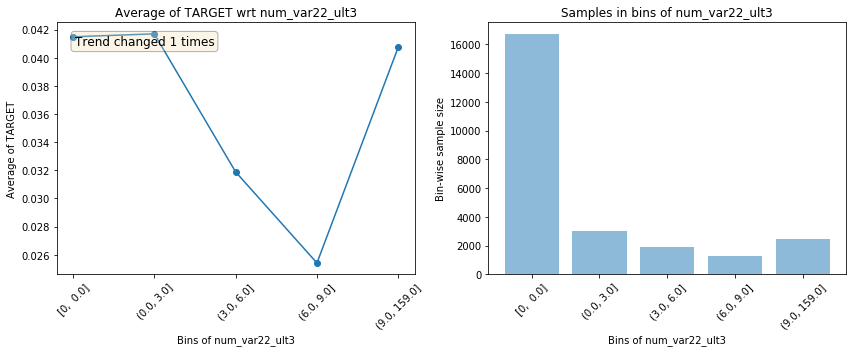

                                           Test data plots                                            


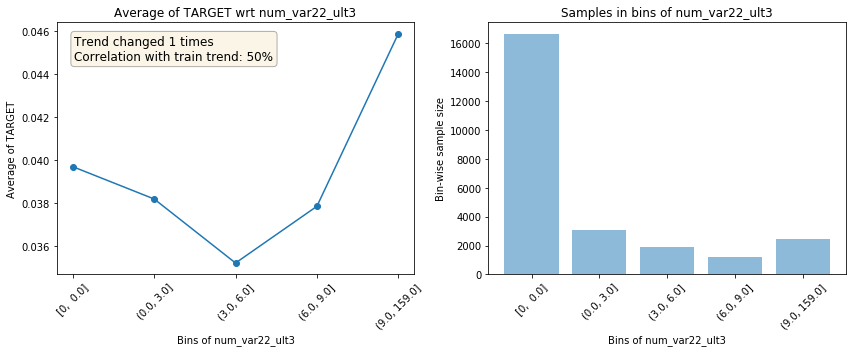

--------------------------------------------------------------------------------------------------------------




In [12]:
grouped_train, grouped_test = univariate_plotter(data=data_train, target_col='TARGET', feature='num_var22_ult3',
                                                 data_test=data_test)

In [13]:
print('train')
print(grouped_train)
print('\ntest')
print(grouped_test)

train
  num_var22_ult3  Samples_in_bin  TARGET_mean  num_var22_ult3_mean
0      [0,  0.0]           16680     0.041487             0.000000
1     (0.0, 3.0]            3022     0.041694             3.000000
2     (3.0, 6.0]            1913     0.031887             6.000000
3     (6.0, 9.0]            1259     0.025417             9.000000
4   (9.0, 159.0]            2478     0.040759            18.108959

test
  num_var22_ult3  Samples_in_bin  TARGET_mean  num_var22_ult3_mean
0      [0,  0.0]           16624     0.039702             0.000000
1     (0.0, 3.0]            3089     0.038200             3.000000
2     (3.0, 6.0]            1902     0.035226             6.000000
3     (6.0, 9.0]            1215     0.037860             9.000000
4   (9.0, 159.0]            2485     0.045875            18.106237


In [14]:
dtrain = xgb.DMatrix(X_train[all_but_idx], label=y_train, missing=np.nan)
dtest = xgb.DMatrix(X_test[all_but_idx], label=y_test, missing=np.nan)
dval = xgb.DMatrix(X_val[all_but_idx], label=y_val, missing=np.nan)

params = {'max_depth':8
          , 'learning_rate':0.001
          , 'silent':1
          , 'objective':'binary:logistic'
          , 'min_child_weight':4
          , 'eval_metric' : 'auc'
          , 'col_sample_by_tree': 0.7
          , 'nthread':8 } 
early_stopping_rounds = 50

In [15]:
xgb_model0 = xgb.train(params, dtrain, 100, evals=[(dtrain, 'train')
                                                  , (dtest, 'test')], early_stopping_rounds=early_stopping_rounds) 
fpr, tpr, thresholds = metrics.roc_curve(y_val, xgb_model0.predict(dval))
clear_output()
print('Val GINI = {}'.format(np.round(2*metrics.auc(fpr, tpr)-1,3)))

Val GINI = 0.612


In [16]:
stats = get_trend_stats(data=data_train, target_col='TARGET', data_test=data_test)
importance_df = feature_importance_to_df(xgb_model0)
stats = pd.merge(stats, importance_df, how='left', on='Feature')
stats['importance'] = stats['importance'].fillna(0)
stats.sort_values(by=['importance'], ascending=False, inplace=True)
stats.head()

Returning stats for all numeric features


,Feature,Trend_changes,Trend_changes_test,Trend_correlation,importance
146,saldo_var30,4,4,0.993594,359.0
1,var15,1,1,0.993178,330.0
283,var38,2,2,0.932948,270.0
12,imp_op_var41_efect_ult1,0,0,1.000000,245.0
252,saldo_medio_var5_hace3,2,4,0.959118,199.0


In [17]:
unstable = list(stats[stats['Trend_correlation']<0.98]['Feature'])
dtrain = xgb.DMatrix(X_train[all_but_idx].drop(unstable, axis=1), label=y_train, missing=np.nan)
dtest = xgb.DMatrix(X_test[all_but_idx].drop(unstable, axis=1), label=y_test, missing=np.nan)
dval = xgb.DMatrix(X_val[all_but_idx].drop(unstable, axis=1), label=y_val, missing=np.nan)

xgb_model1 = xgb.train(params, dtrain, 100, evals=[(dtrain, 'train')
                                                  , (dtest, 'test')], early_stopping_rounds=early_stopping_rounds) 

fpr, tpr, thresholds = metrics.roc_curve(y_val, xgb_model1.predict(dval))
clear_output()
print('Final {} features used'.format(len(stats) - len(unstable)))
print('Val GINI = {}'.format(np.round(2*metrics.auc(fpr, tpr)-1,3)))

Final 219 features used
Val GINI = 0.6


In [18]:
unstable = list(stats[stats['Trend_correlation']<0.95]['Feature'])
dtrain = xgb.DMatrix(X_train[all_but_idx].drop(unstable, axis=1), label=y_train, missing=np.nan)
dtest = xgb.DMatrix(X_test[all_but_idx].drop(unstable, axis=1), label=y_test, missing=np.nan)
dval = xgb.DMatrix(X_val[all_but_idx].drop(unstable, axis=1), label=y_val, missing=np.nan)

xgb_model2 = xgb.train(params, dtrain, 100, evals=[(dtrain, 'train')
                                                  , (dtest, 'test')], early_stopping_rounds=early_stopping_rounds) 

fpr, tpr, thresholds = metrics.roc_curve(y_val, xgb_model2.predict(dval))
clear_output()
print('Final {} features used'.format(len(stats) - len(unstable)))
print('Val GINI = {}'.format(np.round(2*metrics.auc(fpr, tpr)-1,3)))

Final 228 features used
Val GINI = 0.6


In [19]:
unstable = list(stats[stats['Trend_correlation']<0.90]['Feature'])
dtrain = xgb.DMatrix(X_train[all_but_idx].drop(unstable, axis=1), label=y_train, missing=np.nan)
dtest = xgb.DMatrix(X_test[all_but_idx].drop(unstable, axis=1), label=y_test, missing=np.nan)
dval = xgb.DMatrix(X_val[all_but_idx].drop(unstable, axis=1), label=y_val, missing=np.nan)

xgb_model3 = xgb.train(params, dtrain, 100, evals=[(dtrain, 'train')
                                                  , (dtest, 'test')], early_stopping_rounds=early_stopping_rounds) 

fpr, tpr, thresholds = metrics.roc_curve(y_val, xgb_model3.predict(dval))
clear_output()
print('Final {} features used'.format(len(stats) - len(unstable)))
print('Val GINI = {}'.format(np.round(2*metrics.auc(fpr, tpr)-1,3)))

Final 236 features used
Val GINI = 0.612


In [20]:
unstable = list(stats[(stats['Trend_correlation']<0.95) | (stats['importance']<50)]['Feature'])
dtrain = xgb.DMatrix(X_train[all_but_idx].drop(unstable, axis=1), label=y_train, missing=np.nan)
dtest = xgb.DMatrix(X_test[all_but_idx].drop(unstable, axis=1), label=y_test, missing=np.nan)
dval = xgb.DMatrix(X_val[all_but_idx].drop(unstable, axis=1), label=y_val, missing=np.nan)

xgb_model4 = xgb.train(params, dtrain, 100, evals=[(dtrain, 'train')
                                                  , (dtest, 'test')], early_stopping_rounds=early_stopping_rounds) 

fpr, tpr, thresholds = metrics.roc_curve(y_val, xgb_model4.predict(dval))
clear_output()
print('Final {} features used'.format(len(stats) - len(unstable)))
print('Val GINI = {}'.format(np.round(2*metrics.auc(fpr, tpr)-1,3)))

Final 10 features used
Val GINI = 0.6
